# Testing `SeqData`

**Authorship:**
Adam Klie, *04/06/2022*
***
**Description:**
Notebook to test and highlight the functionality of EUGENe's data structure `SeqData`.

<img src="../../docs/_static/dataloading/dataloaders/SeqData/SeqData.png" width=300 height=300 />

Check out this page for more information and future directions for `SeqData`: [https://www.notion.so/dataloading-Dataloading-in-eugene-611b6adb3a9947a5b188a734acaa8a4f](https://www.notion.so/dataloading-Dataloading-in-eugene-611b6adb3a9947a5b188a734acaa8a4f) 
***

In [2]:
import numpy as np

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

# Basic import
import eugene as eu
import logging

Global seed set to 13


GPU is available: True
Number of GPUs: 1
Current GPU: 0
GPUs: Quadro RTX 5000


# Exploring `SeqData` on random dataset
We will utilize a set of 1000 random sequences with 1000 random activities between 0 and 1.

In [4]:
# We make use of the `datasets` module to load the data. We also print the SeqData object to see what it looks like.
sdata = eu.datasets.random1000()
sdata

SeqData object with = 1000 seqs
seqs = (1000,)
names = (1000,)
rev_seqs = None
ohe_seqs = None
ohe_rev_seqs = None
seqs_annot: 'target'
pos_annot: PyRanges object with 1400 features
seqsm: None
uns: None

## `seqs`
Sequences in SeqData are simply ndarrays of unicode strings. We currently only support slicing by the sequence index dimension and not the position of the sequence.

In [8]:
sdata.seqs[:10]

array(['AGGACAGATTTTCGCGTGTTGGGCCCAACGGATCAGCCTCTATAAACCGTATCCGACAATATAAGG',
       'TGACTCCAGGAAGGACGTGTTGTTCGAGAAGAGCAGCCGAAAAAGTTAGCGATCGGCTCGACTTTC',
       'TATACTAGGAAGTCGACTTAAGAGATGCAAACAAAGAGTGGGGCATATTATCTAGCCAGACGTCAC',
       'AGCTTACGCAGGTGTCAGAGAGTCCACCGATCCAATCTCTCGCTGTCGGGGGGTACTTTCAGTGTG',
       'TATAACCTTTCTTGGGGCGACGATAAGCGCAATAACAAGTCCGTCTGCTTCCAAAAGCGATACTGA',
       'ACACAGTCATATATCGCCACTTCCGCATACTATAAACACTCAATGGGAGGAATGCTAGTGATTCTC',
       'CTGCGGTCCACAGAAGTACCTTATGGCAACTTTGCTCGATCCTTAAAAACCGGGGAATACCCTCAG',
       'AAATCCCCTTAACCGGATGCCAAAATCTATGTATTCTTCGATATGCTCTCGATGTGACGTTTTCGC',
       'GTTTGAGCCCCTGCTTCAAAAGGTCGGCGTCAGACAAGTTACCGTTCAAGGTCTTCGCCGGTTTGG',
       'CATCGTTCTGCAATACATGCATGGCCGGCAGCAGGTTGAGTTATAGGGTTGCGTTCGCTGTTGATG'],
      dtype='<U66')

We can operate on each element of the sequence individually like we would with any other string

In [9]:
# Can take the reverse complement of the sequence
eu.pp.reverse_complement_seq(sdata.seqs[0])

'CCTTATATTGTCGGATACGGTTTATAGAGGCTGATCCGTTGGGCCCAACACGCGAAAATCTGTCCT'

In [11]:
# Can encode the sequence in different ways
eu.pp.ohe_DNA_seq(sdata.seqs[0]).shape

(66, 4)

In [12]:
from eugene.preprocessing._otx_preprocess import encode_seq

In [16]:
# TODO: load an OLS dataset so this actually works
encode_seq(sdata.seqs[0], encoding="mixed1")

-1

## `names`
The identifiers of each sequence are stored in another ndarray aligned with `seqs`. If none are provided to the constructor of the SeqData object, they are generated as `seq000`. This is probably going to be deprecated in the future, as these same values are available in the `seqs_annot` atribute.

In [18]:
sdata.names[:5]

array(['seq000', 'seq001', 'seq002', 'seq003', 'seq004'], dtype='<U6')

Like for `seqs`, we can operate on each element of the name individually like we would with any other string

In [19]:
from eugene.preprocessing._utils import ascii_encode

In [21]:
ascii_encode(sdata.names[0])

array([115, 101, 113,  48,  48,  48])

## `rev_seqs`, `ohe_seqs`, `rev_ohe_seqs`
These are aligned ndarrays aligned with `seqs` and `names`. They are the reverse complement of the sequences and the one-hot encoded sequences.

In [22]:
eu.pp.reverse_complement_data(sdata)

SeqData object modified:
	rev_seqs: None -> 1000 rev_seqs added


In [24]:
sdata.rev_seqs[:5]

array(['CCTTATATTGTCGGATACGGTTTATAGAGGCTGATCCGTTGGGCCCAACACGCGAAAATCTGTCCT',
       'GAAAGTCGAGCCGATCGCTAACTTTTTCGGCTGCTCTTCTCGAACAACACGTCCTTCCTGGAGTCA',
       'GTGACGTCTGGCTAGATAATATGCCCCACTCTTTGTTTGCATCTCTTAAGTCGACTTCCTAGTATA',
       'CACACTGAAAGTACCCCCCGACAGCGAGAGATTGGATCGGTGGACTCTCTGACACCTGCGTAAGCT',
       'TCAGTATCGCTTTTGGAAGCAGACGGACTTGTTATTGCGCTTATCGTCGCCCCAAGAAAGGTTATA'],
      dtype='<U66')

In [26]:
eu.pp.one_hot_encode_data(sdata)

SeqData object modified:
	ohe_seqs: None -> 1000 ohe_seqs added
	ohe_rev_seqs: None -> 1000 ohe_rev_seqs added


In [28]:
sdata.ohe_seqs.shape, sdata.ohe_rev_seqs.shape

((1000, 66, 4), (1000, 66, 4))

## `seqs_annot`
This is a pandas dataframe aligned along the number of sequence dimensions. The columns represent annotations of the sequences and often store things like activities of the sequences or other metadata.

In [32]:
# We can access metadata through slicing the SeqData object with a string
sdata.seqs_annot["target"][:5]

seq000    0.866168
seq001    0.800737
seq002    0.703108
seq003    0.465782
seq004    0.676781
Name: target, dtype: float64

In [31]:
# We can set metadata through slicing the SeqData object with a string
sdata["log_target"] = np.log(sdata["target"])
sdata["log_target"][:5]

seq000   -0.143677
seq001   -0.222223
seq002   -0.352245
seq003   -0.764037
seq004   -0.390407
Name: log_target, dtype: float64

In [33]:
# We can also slice the SeqData object using a boolean mask
m = sdata["target"] > 0.5
sdata[m]

SeqData object with = 511 seqs
seqs = (511,)
names = (511,)
rev_seqs = (511,)
ohe_seqs = (511, 66, 4)
ohe_rev_seqs = (511, 66, 4)
seqs_annot: 'target', 'log_target'
pos_annot: PyRanges object with 1400 features
seqsm: None
uns: None

## `pos_annot`
This is a PyRanges object that is not aligned to either the sequence number or position along the sequence. It is essentially a `bed` file attached to the set of sequences that is utilized for many of the plotting functions in EUGENe.

In [34]:
sdata.pos_annot

,Chromosome,Start,End,Name,Score,Strand
0,seq000,27,34,ETS,.,+
1,seq000,47,54,GATA,.,-
2,seq000,48,55,ETS,.,-
3,seq001,6,13,ETS,.,+
4,seq002,5,12,ETS,.,+
...,...,...,...,...,...,...
1395,seq994,20,27,ETS,.,-
1396,seq995,8,15,ETS,.,+
1397,seq996,54,61,ETS,.,-
1398,seq997,35,42,ETS,.,+


In [36]:
# Because this is just a PyRanges object under the hood, we can make use of the PyRanges methods
sdata.pos_annot.sample(5)

,Chromosome,Start,End,Name,Score,Strand
0,seq018,25,32,GATA,.,+
1,seq128,0,7,ETS,.,-
2,seq393,57,64,ETS,.,-
3,seq531,23,30,GATA,.,+
4,seq579,1,8,ETS,.,-


In [37]:
# We can also extract a Panda DataFrame that can be manipulated as desired
dataframe = sdata.pos_annot.df
dataframe[dataframe["Chromosome"] == "seq013"]

,Chromosome,Start,End,Name,Score,Strand
23,seq013,3,10,ETS,.,+


## `seqsm`
This is a carry over from `AnnData` meant to capture multidiemensional annotations for each sequence. It is a dictionary at its core that contains values that must be aligned with the number sequences but can have varying dimensions along the other axes. We often use `seqsm` to hold dimensionality reduced representations of sequences.

In [41]:
sdata.seqsm["seqs_pca"] = np.random.rand(len(sdata.seqs), 2)

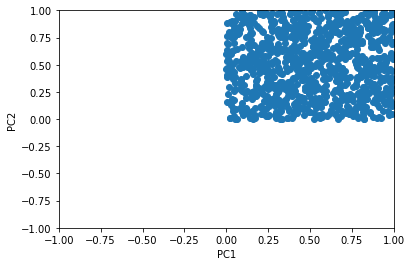

In [43]:
eu.pl.pca(sdata, seqsm_key="seqs_pca")

## `uns`
This is for everything else. It is similar to `seqsm` in that it is a dictionary but it is not aligned with the number of sequences. It is intended to be used for storing other information that is not aligned with the sequences.

In [44]:
sdata.uns["uns_key"] = np.random.rand(10, 10)

## Building a PyTorch dataset object with `to_dataset()`
We can use the `to_dataset` function to convert a SeqData object into a PyTorch dataset object. We implemented a simple `SeqDataset` class for this (see `test_SeqDataset.ipynb` for more details).

In [51]:
# We can optionally add in a column from seqs_annot as a target for the dataset object
sdataset = sdata.to_dataset(target="target")
sdataset[0]

No transforms given, assuming just need to tensorize).


(tensor([115., 101., 113.,  48.,  48.,  48.]),
 tensor([[1., 0., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [1., 0., 0., 0.],
         [0., 0., 1., 0.],
         [1., 0., 0., 0.],
         [0., 0., 0., 1.],
         [0., 0., 0., 1.],
         [0., 0., 0., 1.],
         [0., 0., 0., 1.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.],
         [0., 0., 0., 1.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [1., 0., 0., 0.],
         [0., 0., 0., 1.],
         [0., 1., 0., 0.],
         [1., 0., 0., 0.],
        

## Writing SeqData to disk as `h5sd` file with `write_h5sd()`
Writing a SeqData object is a simple function call that wraps the `write_h5sd` function in `_io.py`.

In [53]:
sdata.write_h5sd("/cellar/users/aklie/projects/EUGENe/tests/_data/test_SeqData.h5sd")

In [55]:
# We can also read in a SeqData object from a HDF5 file and expect to get everything back the way it was
eu.dl.read("/cellar/users/aklie/projects/EUGENe/tests/_data/test_SeqData.h5sd")

SeqData object with = 1000 seqs
seqs = (1000,)
names = (1000,)
rev_seqs = (1000,)
ohe_seqs = (1000, 66, 4)
ohe_rev_seqs = (1000, 66, 4)
seqs_annot: 'log_target', 'target'
pos_annot: PyRanges object with 1400 features
seqsm: 'seqs_pca'
uns: 'uns_key'

---

# Scratch

In [9]:
sdata = eu.dl.read_csv(file="../_data/test_1000seqs_66/test_seqs.tsv")
sdata

SeqData object with = 1000 seqs
seqs = (1000,)
names = None
rev_seqs = None
ohe_seqs = None
ohe_rev_seqs = None
seqs_annot: 'TARGETS'
pos_annot: None

In [10]:
sdata = eu.dl.read_fasta(seq_file="../_data/test_1000seqs_66/test_seqs.fa", target_file="../_data/test_1000seqs_66/test_activities.npy")
sdata

SeqData object with = 1000 seqs
seqs = (1000,)
names = (1000,)
rev_seqs = None
ohe_seqs = None
ohe_rev_seqs = None
seqs_annot: 'TARGETS'
pos_annot: None

In [15]:
sdata = eu.dl.read_numpy(seq_file="../_data/test_1000seqs_66/test_ohe_seqs.npy", names_file="../_data/test_1000seqs_66/test_ids.npy", target_file="../_data/test_1000seqs_66/test_activities.npy", ohe_encoded=True)
sdata.seqs = np.load("../_data/test_1000seqs_66/test_seqs.npy")
sdata.write_h5sd("../_data/test_1000seqs_66/test_seqs.h5sd")
sdata

SeqData object with = 1000 seqs
seqs = (1000,)
names = (1000,)
rev_seqs = None
ohe_seqs = (1000, 66, 4)
ohe_rev_seqs = None
seqs_annot: 'TARGETS'
pos_annot: None

In [16]:
sdata = eu.dl.read("../_data/test_1000seqs_66/test_seqs.h5sd")
sdata

SeqData object with = 1000 seqs
seqs = (1000,)
names = (1000,)
rev_seqs = None
ohe_seqs = (1000, 66, 4)
ohe_rev_seqs = None
seqs_annot: 'TARGETS'
pos_annot: None

## Creating a dataloader

In [17]:
sdataset = sdata.to_dataset(label="TARGETS", seq_transforms = ["augment", "one_hot_encode"], transform_kwargs={"enhancer": "Core-otx-a"})

In [18]:
sdataset.seqs[0], sdataset.targets[0], sdataset.rev_seqs, sdataset.transform

('GTAGGTAAGCGGGGTATTTGCACTTCCCTTAATCCATAAGGGCTTTTGCCGCGTGTTAGAGGAAGC',
 0.7708982213861482,
 None,
 Compose(
 ))

In [21]:
sdataset[0]

(tensor([115., 101., 113.,  48.,  48.,  49.,  36.]),
 tensor([[0., 0., 1., 0.],
         [0., 0., 0., 1.],
         [1., 0., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [0., 0., 1., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.],
         [1., 0., 0., 0.],
         [0., 0., 0., 1.],
         [0., 0., 0., 1.],
         [0., 0., 0., 1.],
         [0., 0., 1., 0.],
         [0., 1., 0., 0.],
         [1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 0., 1.],
         [0., 0., 0., 1.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 0., 1.],
         [0., 0., 0., 1.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [0., 0., 0., 1.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.],
  

In [22]:
# Instantiate a DataLoader
from torch.utils.data import DataLoader
test_dataloader = DataLoader(sdataset, batch_size=32, shuffle=True, num_workers=0)

In [23]:
# Check the DataLoader
for i_batch, sample_batched in enumerate(test_dataloader):
    print(i_batch, sample_batched[0].size(), sample_batched[1].size(), sample_batched[2].size(), sample_batched[3].size())
    # observe 4th batch and stop.
    if i_batch == 3:
        break

0 torch.Size([32, 7]) torch.Size([32, 66, 4]) torch.Size([32, 1]) torch.Size([32])
1 torch.Size([32, 7]) torch.Size([32, 66, 4]) torch.Size([32, 1]) torch.Size([32])
2 torch.Size([32, 7]) torch.Size([32, 66, 4]) torch.Size([32, 1]) torch.Size([32])
3 torch.Size([32, 7]) torch.Size([32, 66, 4]) torch.Size([32, 1]) torch.Size([32])


## SeqDataModule

In [24]:
from torchvision import transforms
data_transform = transforms.Compose([eu.dl.ToTensor(transpose=True)])
datamodule = eu.dl.SeqDataModule(seq_file=f"../_data/test_1000seqs_66/test_ohe_seqs.npy", batch_size=32, transform=data_transform, read_kwargs={"return_numpy": True})
datamodule.setup()
dataset = datamodule.train_dataloader().dataset
assert(len(dataset[0]) == 4)

In [25]:
dataset[0]

(tensor([-1.]),
 tensor([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
          0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
          0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
          0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
          1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
          0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
         [1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,

In [6]:
names, seqs, rev_seqs, targets = eu.dl.read_numpy(f"../_data/test_1000seqs_66/test_seqs.npy", names_file=f"../_data/test_1000seqs_66/test_ids.npy", target_file=f"../_data/test_1000seqs_66/test_labels.npy", rev_seq_file=f"../_data/test_1000seqs_66/test_rev_seqs.npy", return_numpy=True)
sdata = eu.dl.SeqData(names=names, seqs=seqs, seqs_annot=targets, rev_seqs=rev_seqs)
sdataset = sdata.to_dataset(label=0, seq_transforms = ["augment", "one_hot_encode"], transform_kwargs={"enhancer": "Core-otx-a"})
assert(sdataset[0])

## H5 test stuff

In [8]:
sdata.write_h5sd("../_data/test_1000seqs_66/test_seqs.h5sd")

In [ ]:
def write_elem(
    f: "Union[H5Group, ZarrGroup]",
    k: str,
    elem: Any,
    *args,
    modifiers=frozenset(),
    **kwargs,
):
    """
    Write an element to a disk store using it's anndata encoding.
    Params
    ------
    f
        The store to write to.
    k
        The key to write for this value.
    elem
        The element to write as k to f.
    """
    dest_type = type(f)
    if elem is None:
        return
    t = type(elem)
    if k == "/":
        f.clear()
    elif k in f:
        del f[k]
    if (
        hasattr(elem, "dtype")
        and (dest_type, (t, elem.dtype.kind), modifiers) in write
    ):
        get_writer(dest_type, (t, elem.dtype.kind), modifiers)(
            f, k, elem, *args, **kwargs
        )
    else:
        get_writer(dest_type, t, modifiers)(f, k, elem, *args, **kwargs)

In [ ]:
    def get_writer(self, dest_type, typ, modifiers=frozenset()):
        import h5py

        if dest_type is h5py.File:
            dest_type = h5py.Group
        modifiers = frozenset(modifiers)

        if (dest_type, typ, modifiers) not in self.write:
            raise TypeError(
                f"No method has been defined for writing {typ} elements to {dest_type}"
            )

        return self.write[(dest_type, typ, modifiers)]

In [ ]:
from typing import Any, NamedTuple, Tuple, Type, Callable, Union

In [ ]:
write_elem(f, "seq_annot", sdata.seqs_annot)

AttributeError: type object 'Group' has no attribute 'write'

In [ ]:
sdata.write_h5sd(filepath)

In [ ]:
test_dict = eu.datasets.load_h5sd(filepath)

{'seqs': array(['GTAGGTAAGCGGGGTATTTGCACTTCCCTTAATCCATAAGGGCTTTTGCCGCGTGTTAGAGGAAGC',
       'TATCCCACACTTGTGTATGGCATCTTCCCCCTCAGCCTCCCTCGTGTCGTACTATACGATCATTTA',
       'AAGAAAGATATTTGGGATGGAGACGCATGATTCATGGCTAGTTCGGAGAGCGAACGGCGGAGGCCT',
       'AGGTGATATTCAGGAGGATATGGGCTCCACAACTTTTTCCGTCGTAGCAAAGCATAAGGCTGACAA',
       'GCTTGGCTTTATACACTTCGCGAAATAGACCTCGATAAGCCATCTCTGTGGTGAGCTATCCCGGTT',
       'AATGCTAGTTGTGCGGGTTGTAATTGCTAGTAACGGCCGGTTCTATTACATCTAATGGAAGGTTGT',
       'TCTATTGATTCTTCGTCAGAACTCCCCGTAATATACATTTTTGGATATTGGCGCCCCCAGCTGGCA',
       'CATGTAATATGTGTATATTCACACGTAATAACAGGTATGAATGATGTCACGCCGTCTCTGCGCGGC',
       'CCATAAGCTGACGCGCATATCGATATATTCTCTGGGTCCTGGCGACGCACCCCATCCGCGTAATAT',
       'TTAGTCATTCGGGTTTACTCCGATGGTCGCACACGGATAACCAGCTCCTATAAATAGTGACAGGTC',
       'TGACAACTAGACCCTATTCCTAGTACCAGCCCATCTGCCGCTATAATTTTGCATTTGTTTCGTAAA',
       'GGATGAATCGTAATGCCAGCGGACTACCCCCGAGTCACAGATTAAAATCAATTGAGTTCAGTTGCT',
       'ATAGAGAGACAACTTACAGGATTAAGTAGTCGTTGCGTAAGTATGATAGTAGAACCGCG

In [ ]:
test_dict.ohe_seqs

array([[[0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        ...,
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.]],

       [[0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.]],

       [[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.]],

       ...,

       [[0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.]],

       [[1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        ...,
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [1., 0., 0., 0.],
        [0., 0.

In [ ]:
with h5py.File(filepath, "r") as f:
    print(f.name)
    print(list(f.keys()))
    print(f["seqs"].shape)
    print(f["seqs"][0].decode('latin-1'))
    print(f["seqs_annot"].attrs["label"][0])

/
['names', 'ohe_seqs', 'seqs', 'seqs_annot']
(1000,)
GTAGGTAAGCGGGGTATTTGCACTTCCCTTAATCCATAAGGGCTTTTGCCGCGTGTTAGAGGAAGC


KeyError: "Can't open attribute (can't locate attribute: 'label')"

In [ ]:
with h5py.File(filename, "r") as f:
        d = {}
        for k in f.keys():
            # Backwards compat for old raw
            if k == "raw" or k.startswith("raw."):
                continue
            if k == "X" and "X" in as_sparse:
                d[k] = rdasp(f[k])
            elif k == "raw":
                assert False, "unexpected raw format"
            elif k in {"obs", "var"}:
                # Backwards compat
                d[k] = read_dataframe(f[k])
            else:  # Base case
                d[k] = read_elem(f[k])

        d["raw"] = _read_raw(f, as_sparse, rdasp)

        X_dset = f.get("X", None)
        if X_dset is None:
            pass
        elif isinstance(X_dset, h5py.Group):
            d["dtype"] = X_dset["data"].dtype
        elif hasattr(X_dset, "dtype"):
            d["dtype"] = f["X"].dtype
        else:
            raise ValueError()

In [ ]:
h5_read = h5py.File(filepath, "r")

In [ ]:
h5_read.attrs["encoding-type"]

'Seqdata'